In [11]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import get_provider, Vendors
from bokeh.tile_providers import STAMEN_TONER
import os
import pandas as pd
import geopandas as gpd
from dask.distributed import Client
client = Client(processes = False)
import matplotlib.pyplot as plt
import matplotlib.colors as mocolor

# Set the working directory
wd = '/Users/zxs/Downloads'
os.chdir(wd)

# Machine independent path to extract files
zip_file = 'new-york-city-airbnb-open-data.zip'

# Load
df = pd.read_csv('AB_NYC_2019.csv')
df1 = df.drop(['id', 
               'host_id', 
               'host_name', 
               'name', 
               'last_review', 
               'calculated_host_listings_count'], axis = 1)

output_notebook()

/Users/zxs/miniconda3/lib/python3.7/site-packages/distributed/dashboard/core.py:72: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Loading BokehJS ...

In [2]:
%time

# Load building data
nyc = gpd.read_file('nyc.geojson')
nyc.crs = {'init': 'epsg:4326'}

In [3]:
nyc = nyc.set_geometry('geometry')

In [4]:
nyc

,name,shape_area,built_code,heightroof,bbl,cnstrct_yr,num_floors,lststatype,feat_code,groundelev,sub_code,bin,lstmoddate,doitt_id,shape_len,geometry
0,None,1768.56720466,None,26.52854879,4155980564,2001,2,Constructed,2100,6,210000,4462384,2005-05-31T00:00:00,939203,169.940373452,(POLYGON ((-73.74251376378085 40.5990859969582...
1,None,1105.07784259,E,17.94724534,4163500400,1938,1,Constructed,2100,8,210000,4467306,2009-02-14T00:00:00,107990,148.987697797,(POLYGON ((-73.9209069239085 40.55836935121037...
2,None,402.928037087,E,14.24206078,4160290023,1920,2,Constructed,5110,6,511000,4529256,2009-02-14T00:00:00,931167,80.6616704187,(POLYGON ((-73.79828818376016 40.5981663937065...
3,None,668.812178272,None,14.52923087,4163250001,0,2,Constructed,2100,16,210000,4540232,2013-09-19T00:00:00,86053,108.680772452,(POLYGON ((-73.87742893628622 40.5652233910348...
4,None,1094.40958125,None,42.44707032,4160900043,2004,3,Constructed,2100,7,210000,4530675,2010-07-26T00:00:00,998592,146.076028572,(POLYGON ((-73.8033513244464 40.58942758198572...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082344,None,1075.11714587,None,0,1270029880,2016,0,Constructed,2110,0,211000,1795020,2016-06-22T00:00:00,1273171,208.468725527,(POLYGON ((-73.98405709277976 40.7737528139780...
1082345,None,3101.20640579,None,91.93,2270029999,2016,0,Constructed,2110,41,211000,2795001,2016-06-22T00:00:00,1273175,297.302815049,(POLYGON ((-73.9275071528369 40.81758854874324...
1082346,None,98.7076063274,None,0,1014890008,1900,6,Constructed,2110,0,211000,1795027,2016-06-22T00:00:00,1273172,61.5526491168,(POLYGON ((-73.95002186103416 40.7698671357519...
1082347,None,119.192515568,None,0,1270029999,2016,0,Constructed,2110,0,211000,1795001,2016-06-22T00:00:00,1273167,50.7838249026,(POLYGON ((-74.00947987056868 40.7182246790015...


In [5]:
%time

import json

nycjson = json.loads(nyc.to_json())
nyc_json_dat = json.dumps(nycjson)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs


/Users/zxs/miniconda3/lib/python3.7/site-packages/datashader/transfer_functions.py:21: FutureWarning: xarray subclass Image should explicitly define __slots__
  class Image(xr.DataArray):


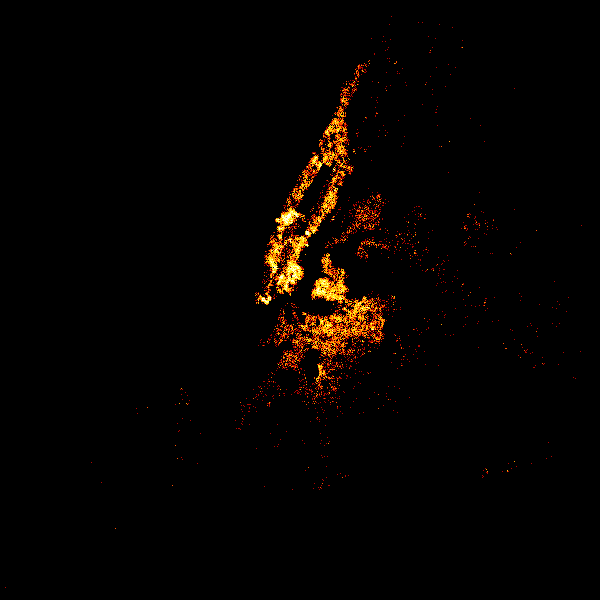

In [8]:
%time

import datashader as ds
from colorcet import fire
from datashader import transfer_functions as tf

agg = ds.Canvas().points(df1, 'longitude', 'latitude')
tf.set_background(tf.shade(agg, cmap = fire), 'black')

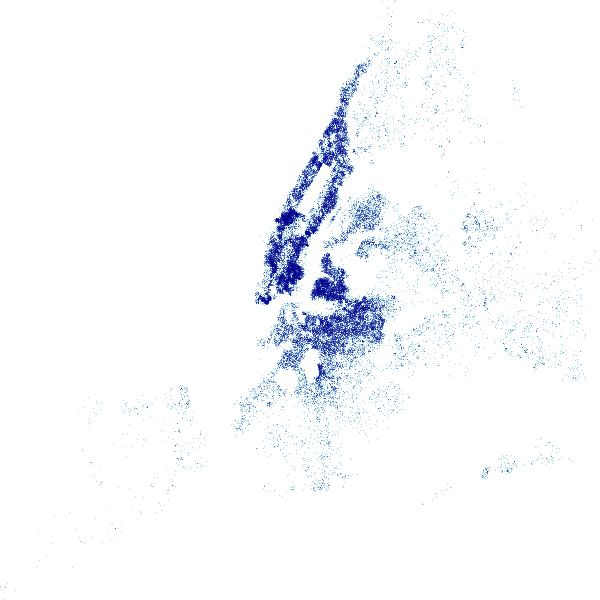

In [9]:
agg = ds.Canvas().points(df1, 'longitude', 'latitude')
tf.set_background(tf.shade(agg))

[]

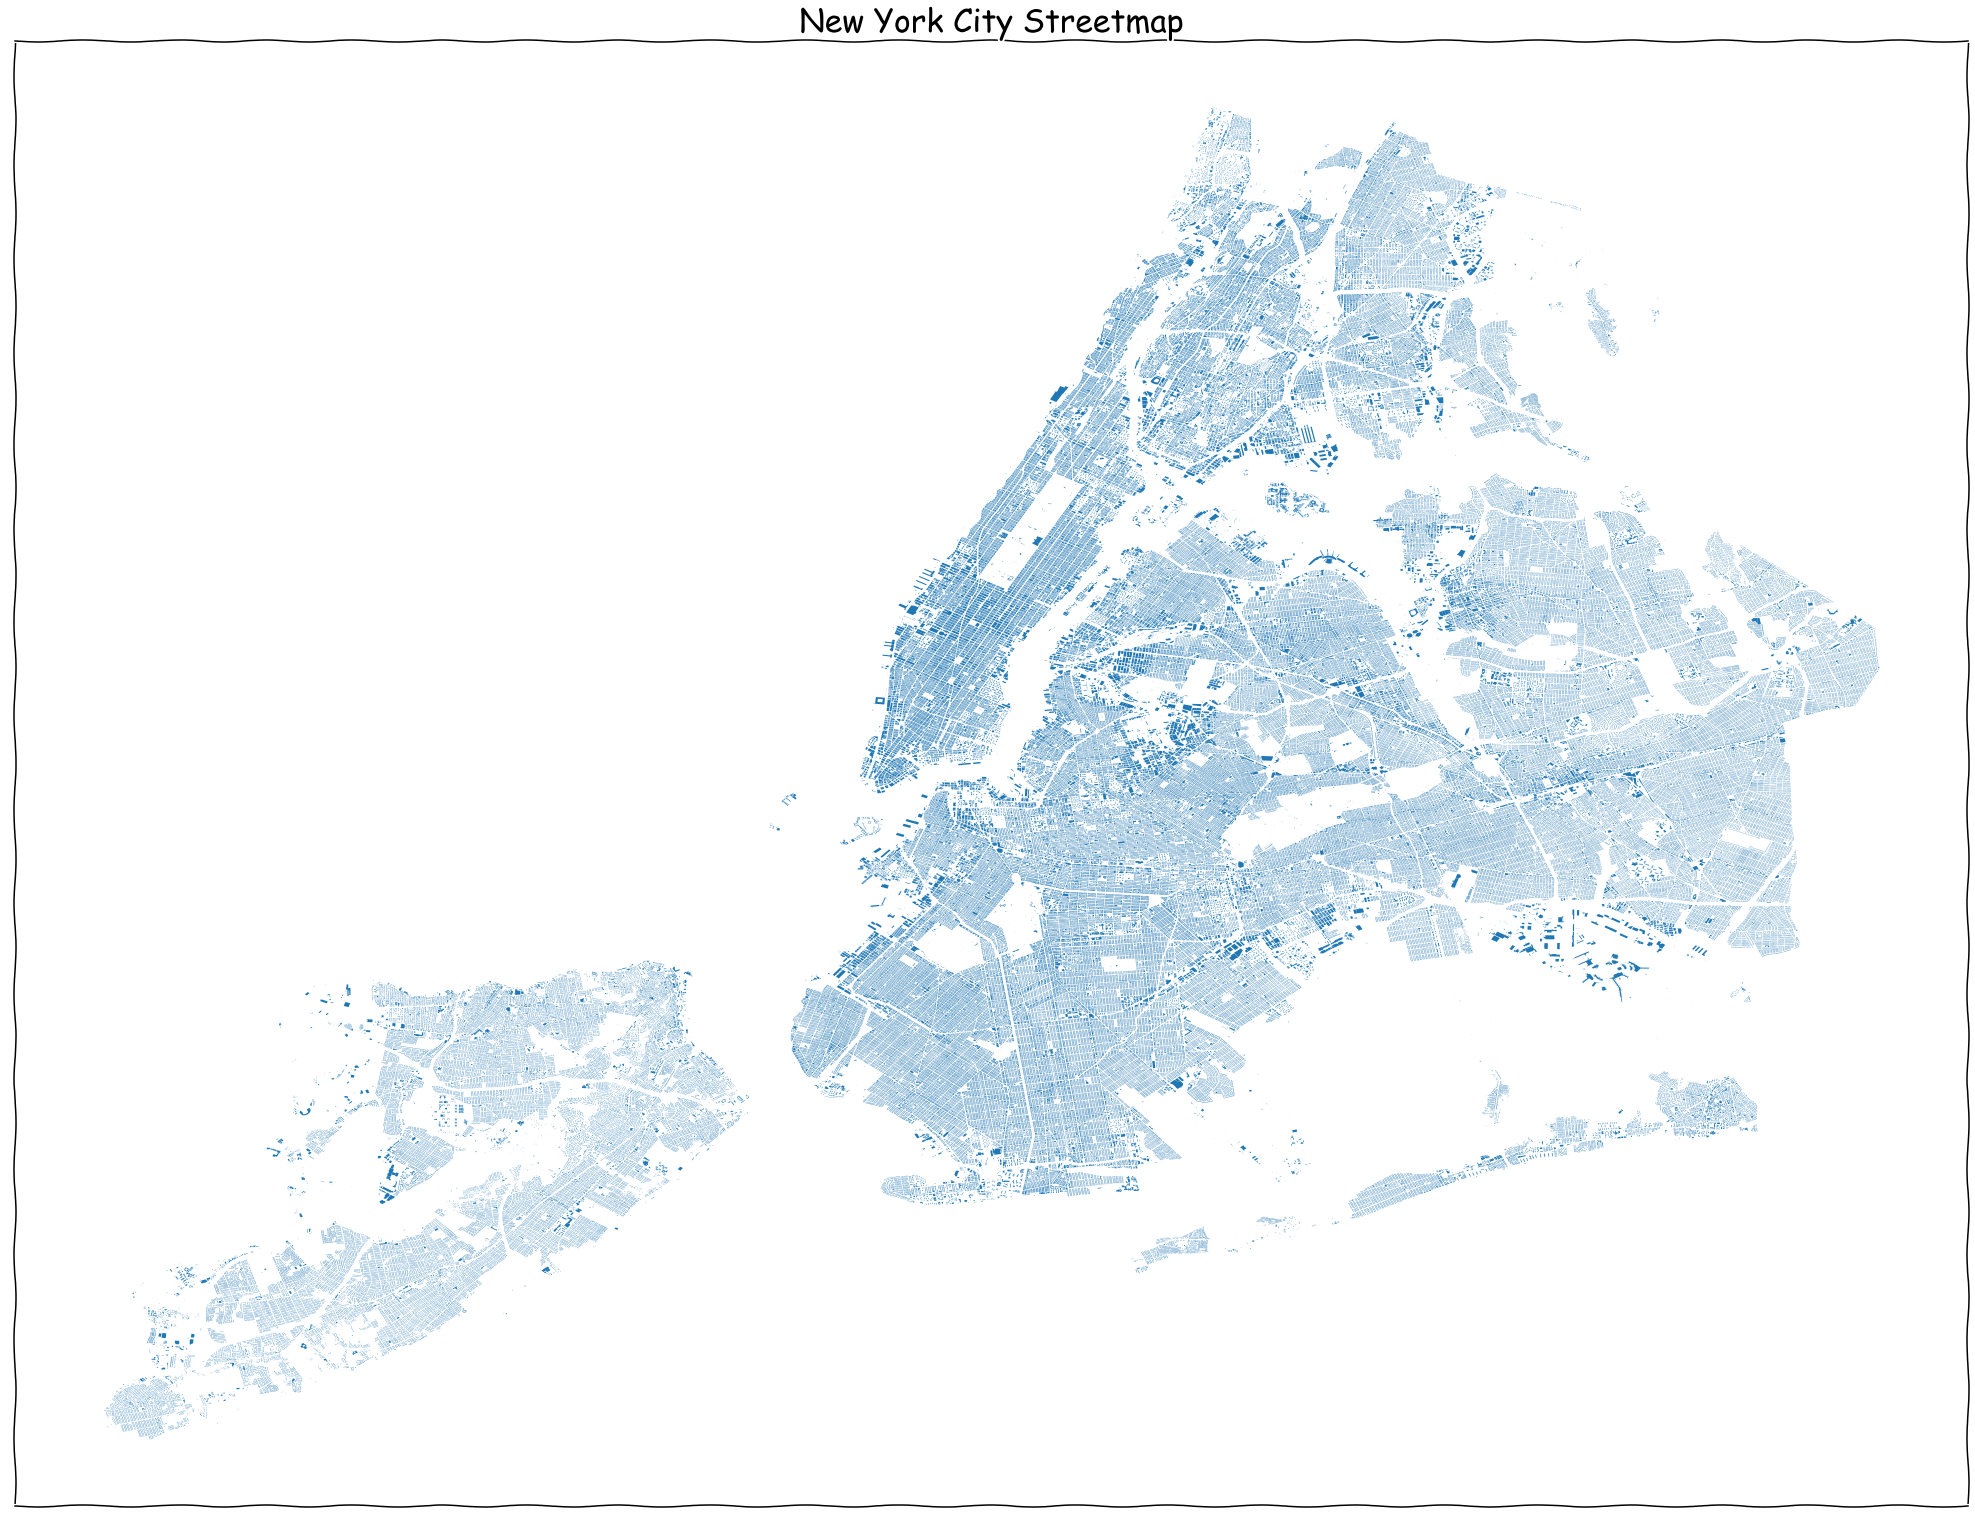

In [12]:
%time

# Visualize using GPD
plt.xkcd()
ax = nyc.plot(figsize = [35, 35])
ax.set_title('New York City Streetmap', fontsize = 32)
ax.set_xticks([])
ax.set_yticks([])

CPU times: user 196 ms, sys: 13.9 ms, total: 210 ms
Wall time: 205 ms


[]

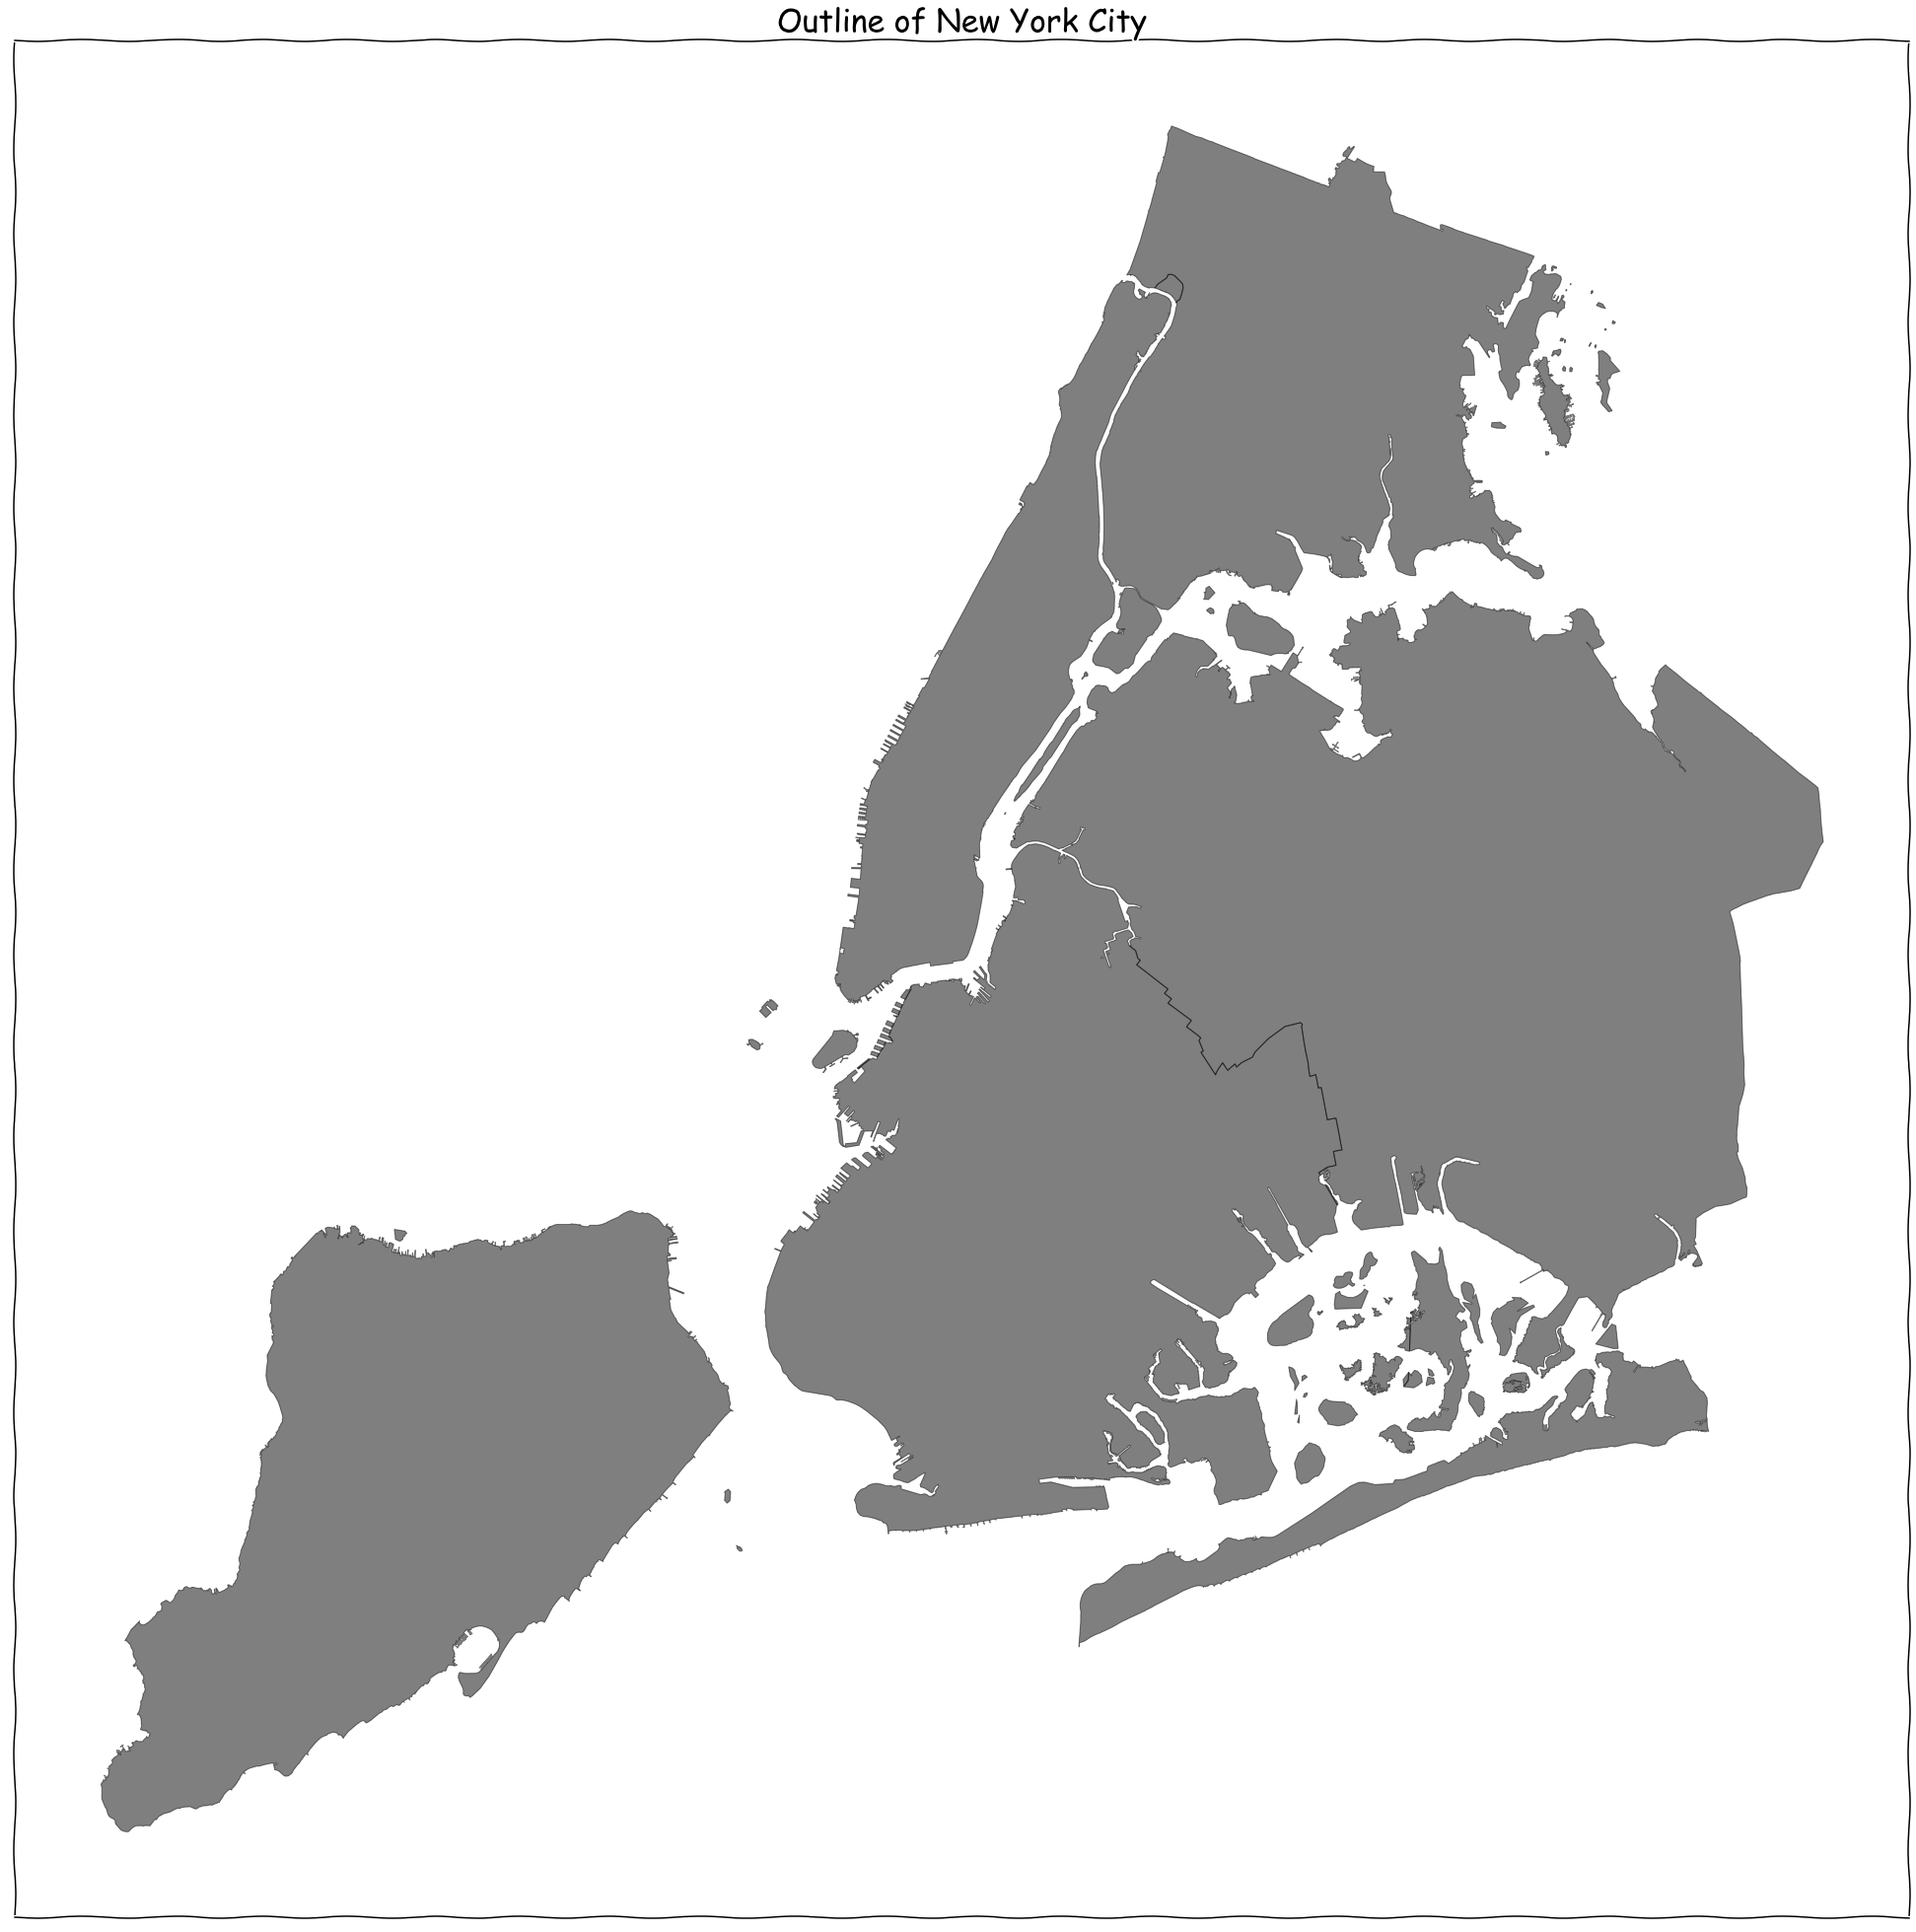

In [30]:
%%time

# Read GPD data
nyc1 = gpd.read_file(gpd.datasets.get_path('nybb'))

# Visualize
ax = nyc1.plot(figsize = [35, 35], alpha = 0.5, edgecolor = 'black', facecolor = 'black')
plt.title('Outline of New York City', fontsize = 32)
ax.set_xticks([])
ax.set_yticks([])

CPU times: user 170 ms, sys: 9.85 ms, total: 180 ms
Wall time: 173 ms


[]

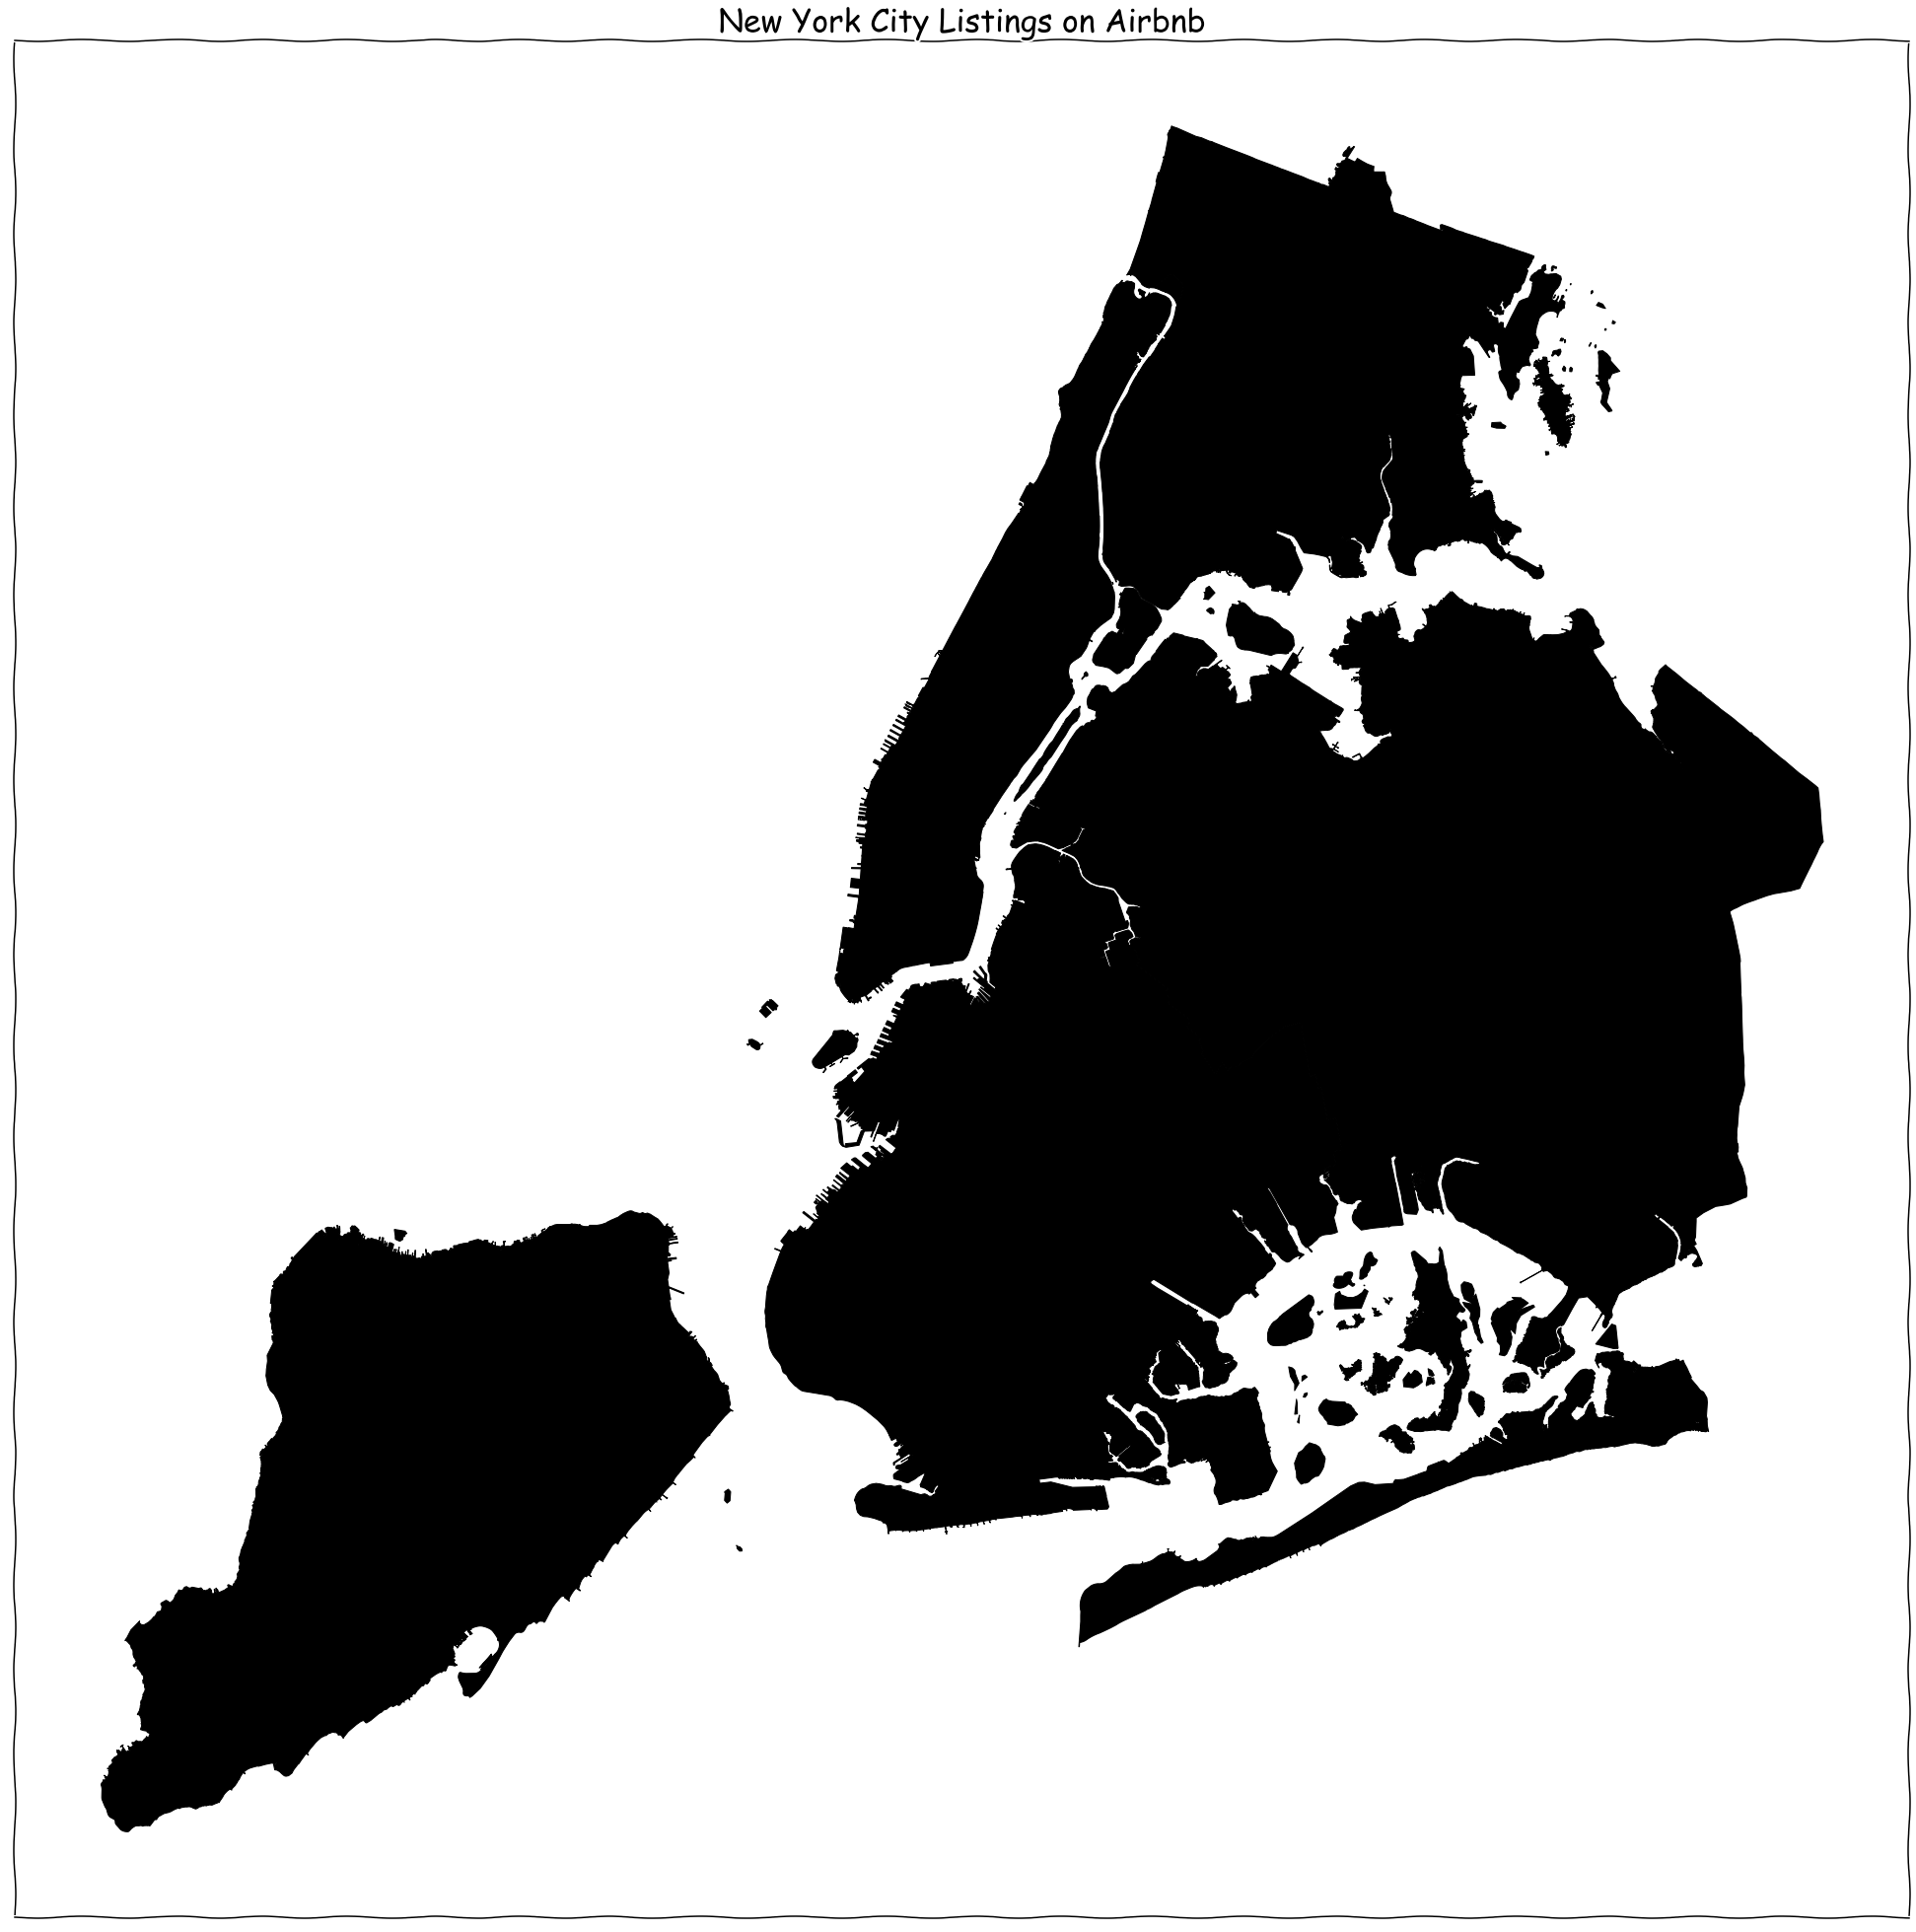

In [36]:
%%time

# Visualize
fig, ax = plt.subplots(figsize = [35, 35])
nyc1.plot(ax = ax, edgecolor = 'black', facecolor = 'black')
plt.title('New York City Listings on Airbnb', fontsize = 32)
ax.set_xticks([])
ax.set_yticks([])
#ax.scatter(df1['longitude'], df1['latitude'], zorder = 1)

/Users/zxs/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


CPU times: user 118 ms, sys: 14.3 ms, total: 132 ms
Wall time: 126 ms


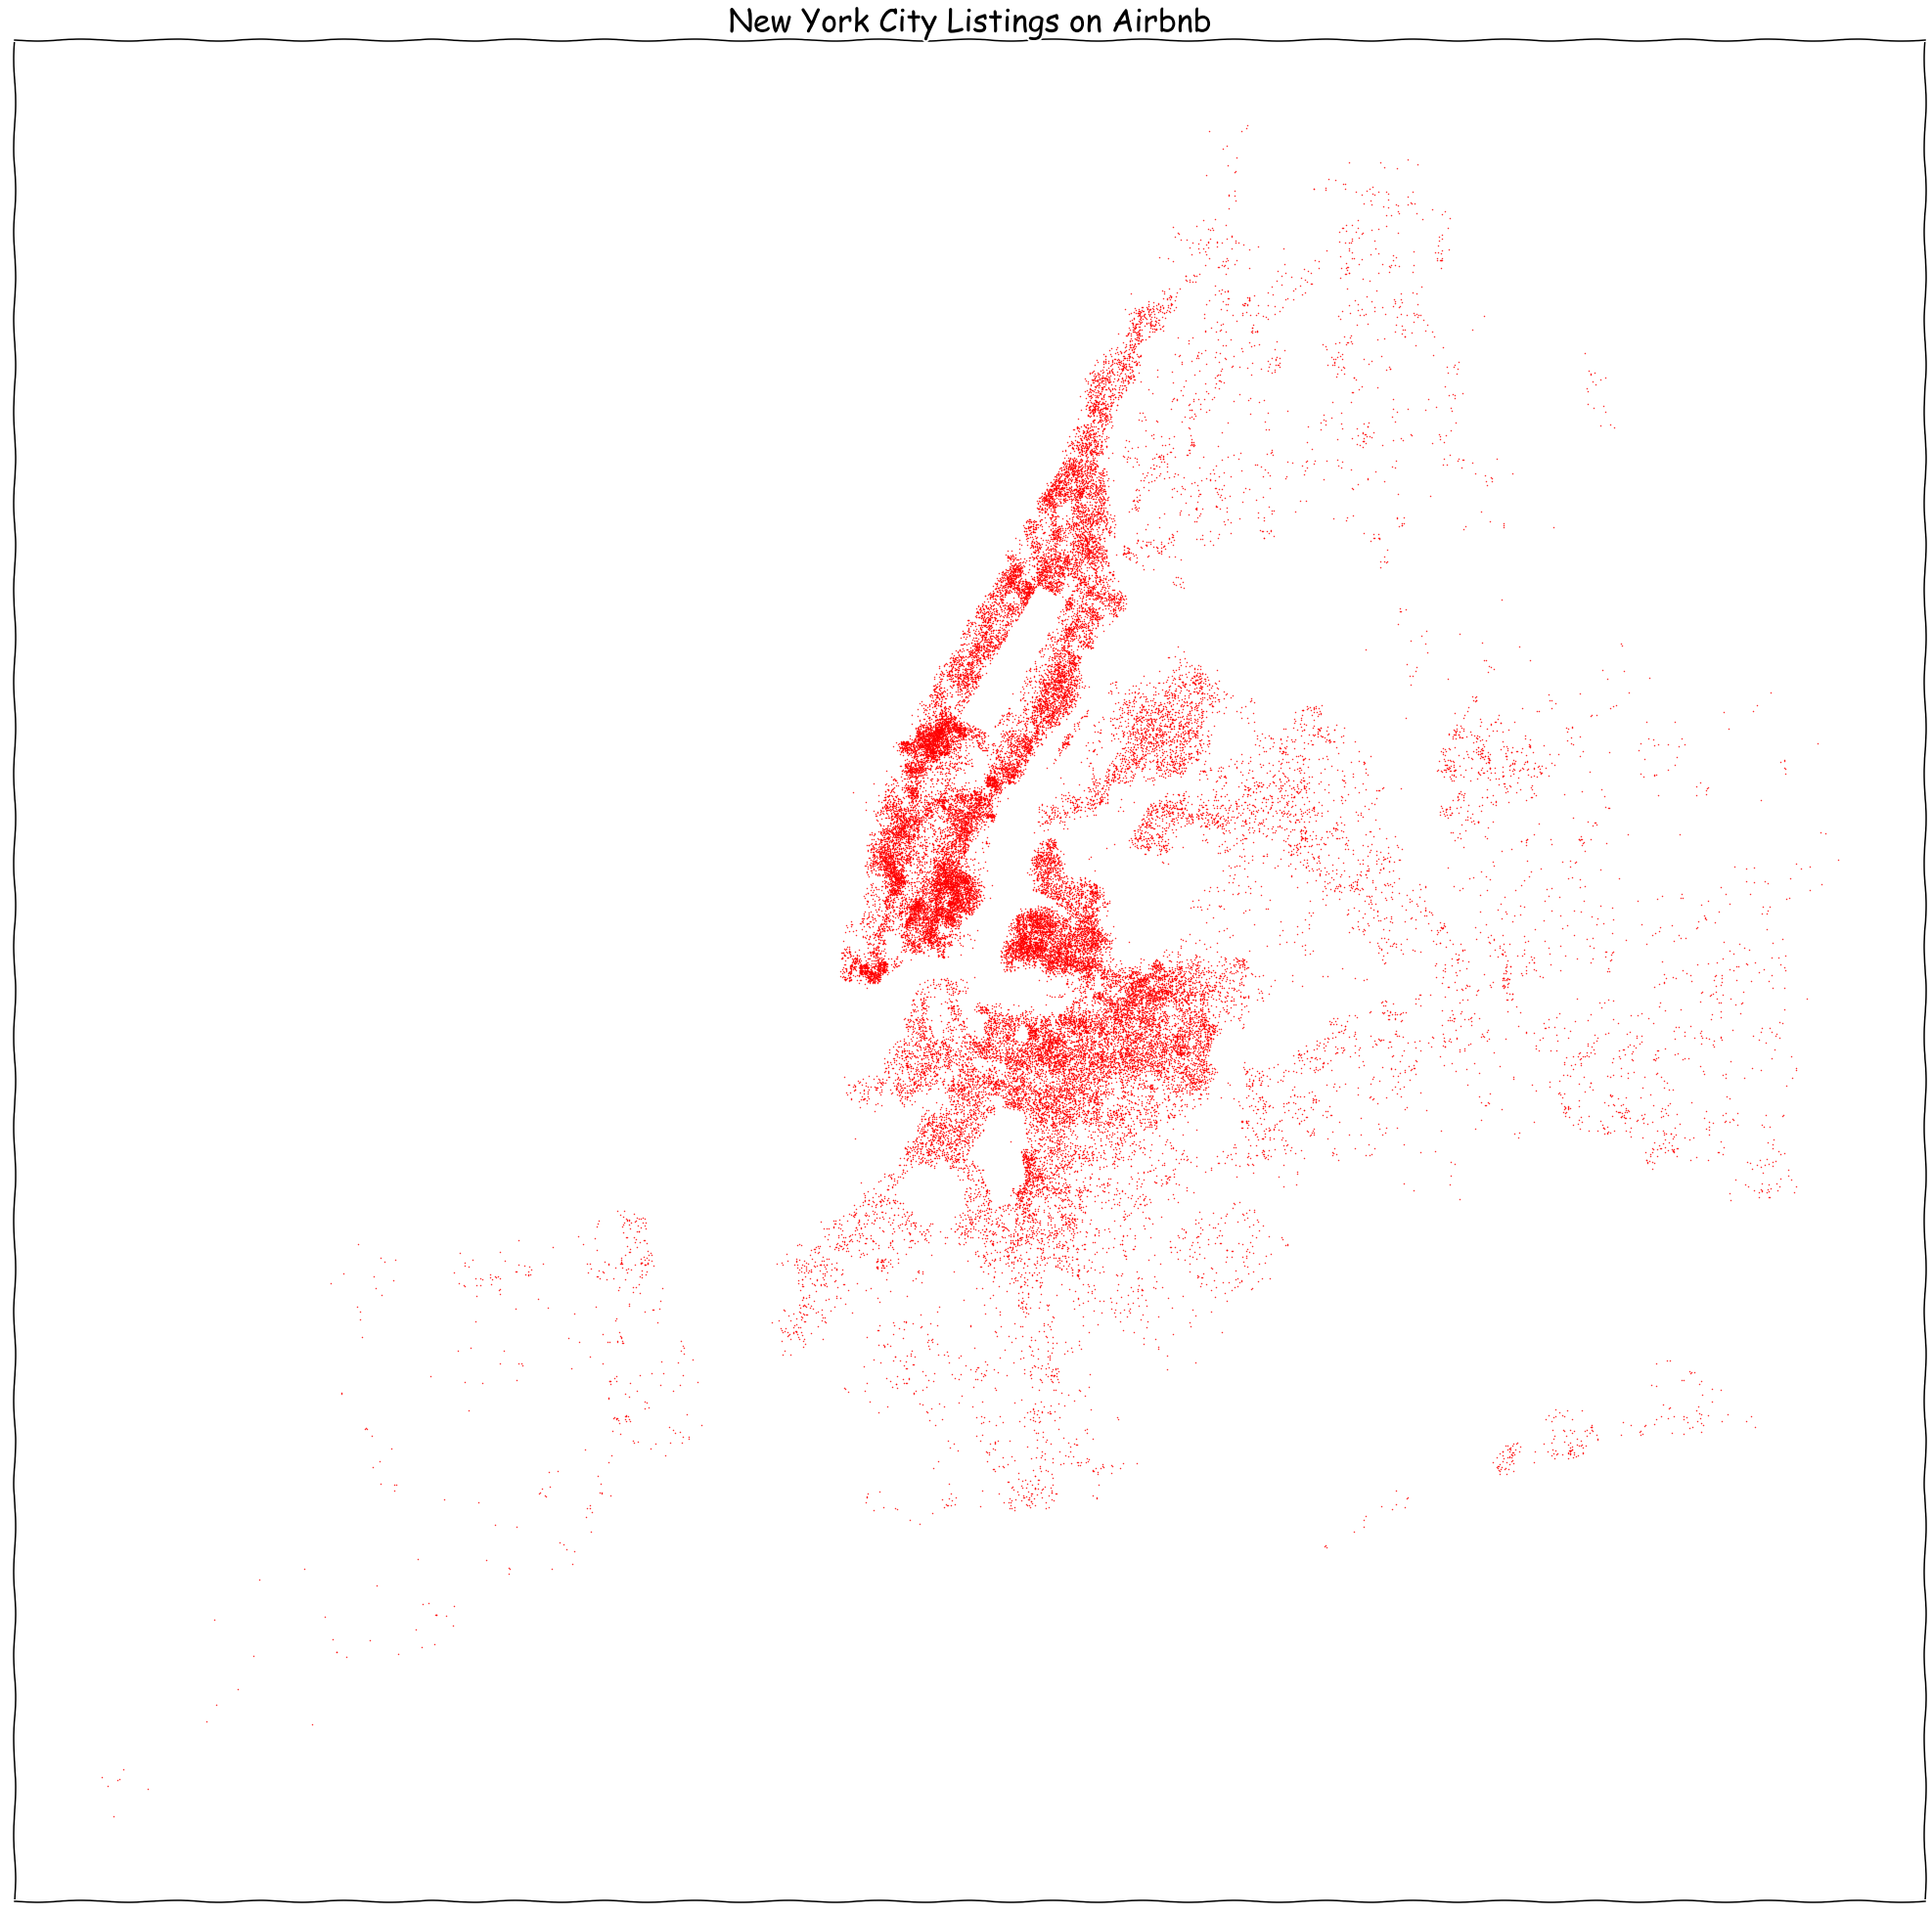

In [49]:
%%time

fig, ax = plt.subplots(figsize = [35, 35])
ax.scatter(y = df1['latitude'], x = df1['longitude'], c = 'r', s = .2)
ax.set_title('New York City Listings on Airbnb', fontsize = 32)
ax.set_xticks([])
ax.set_yticks([])
fig.show()